<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/27_Proportions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proportions

There are many ways to visualize proportions.  We have already seen bar graphs but we'll include them,. stacked bars and pie charts here with `matplotlib` and `seaborn`.

In [26]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')

df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


## Pies and Bars

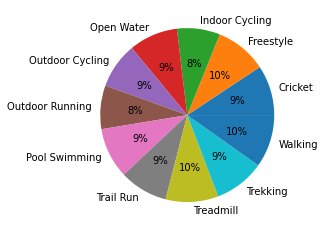

In [2]:
plt.pie(x=df.groupby('workout_type').workout_type.agg('count'),labels = df.groupby('workout_type').workout_type.agg('count').index, autopct='%.0f%%' )
plt.show()

A couple of things about this graphic:

1. It took a fair amount of work with the `groupby` and `index` to create.
2. It is reporting the percentages rather than the raw numbers (we could fix that!)
3. Cricket and Walking are right next to each other and get the same color.

Let's put that same data into a bar chart.

[Text(0, 0, 'Cricket'),
 Text(0, 0, 'Freestyle'),
 Text(0, 0, 'Indoor Cycling'),
 Text(0, 0, 'Open Water'),
 Text(0, 0, 'Outdoor Cycling'),
 Text(0, 0, 'Outdoor Running'),
 Text(0, 0, 'Pool Swimming'),
 Text(0, 0, 'Trail Run'),
 Text(0, 0, 'Treadmill'),
 Text(0, 0, 'Trekking'),
 Text(0, 0, 'Walking')]

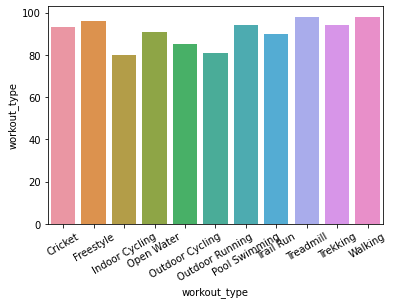

In [9]:
ax = sns.barplot( x= df.groupby('workout_type').workout_type.agg('count').index, y = df.groupby('workout_type').workout_type.agg('count'))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, 'Cricket'),
 Text(0, 0, 'Freestyle'),
 Text(0, 0, 'Indoor Cycling'),
 Text(0, 0, 'Open Water'),
 Text(0, 0, 'Outdoor Cycling'),
 Text(0, 0, 'Outdoor Running'),
 Text(0, 0, 'Pool Swimming'),
 Text(0, 0, 'Trail Run'),
 Text(0, 0, 'Treadmill'),
 Text(0, 0, 'Trekking'),
 Text(0, 0, 'Walking')]

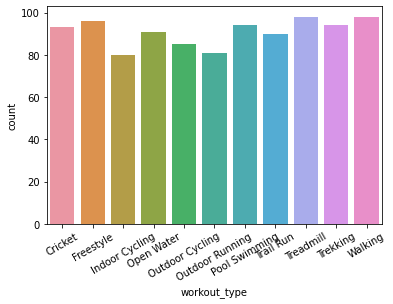

In [25]:
df1 = df.groupby('workout_type').workout_type.agg(count = 'count')
df1 = df1.reset_index()
ax = sns.barplot(data = df1,x = 'workout_type', y = 'count')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

## Mosaic Plots

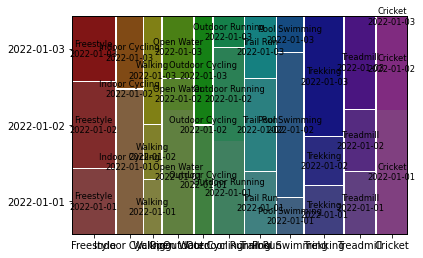

In [39]:
from statsmodels.graphics.mosaicplot import mosaic
df2 = df[(df.activity_day == '2022-01-01')|(df.activity_day == '2022-01-02')|(df.activity_day == '2022-01-03')]
mosaic(df2, [ 'workout_type','activity_day'])
plt.show()

## Colors

You can access the seaborn colors with the following code.

In [ ]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

There are many options; deep, muted, pastel, bright, dark, and colorblind.

In [ ]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## Your Turn

1. Take the first pie chart and create it with the numbers (instead of the percentages) and use a different color scheme that won't have two right next to each other of the same color.